### Μέλη Ομάδας:
Ον/μο1: Καλέμης Δημήτριος  
Αρ. Μητρώου 1:  el18152

Ον/μο2: Παπανικολάου Γρηγόριος
Αρ. Μητρώου 2:  el18649

# Τεχνητή Νοημοσύνη: Εργαστηριακή Άσκηση 3 
Στην άσκηση αυτή θα υλοποιηθούν διάφοροι (σχετικά απλοί) αλγόριθμοι μηχανικής μάθησης για την αυτόματη αναγνώριση μεταξύ 3 μουσικών είδών απο τα δεδομένα που προσφέρει η υπηρεσία Spotify. Συγκεκριμένα, θα δίνονται δύο σύνολα δεδομένων $$Ζ_{train}=\{(x_1,y_1),\dots,(x_n,y_n)\}$$ $$Z_{test} = \{(x_j,y_j),\dots{,(x_k,y_k)}\}$$ όπου κάθε $x_i\in{\mathbb{R}^p}$ είναι ένα διάνυσμα με τα μουσικά χαρακτηριστικά κάθε κομματιού (όπως dancability, acousticness κ.α.) και $y_i$ είναι το είδος του κομματιού - ένας ακέραιος στο $[0,2]$. Σε κάθε περίπτωση καλείστε να σχεδιάσετε έναν ταξινομητή, δηλαδή μια απεικόνιση $$f:\mathbb{R}^p\rightarrow{[0,2]}$$

# 1ο Μέρος: Αξιολόγηση
Στο πρώτο μέρος της άσκησης θα υλοποιηθούν συναρτήσεις που θα χρησιμοποιηθούν για την αξιολόγηση των ταξινομητών που θα χρησιμοποιηθούν στα επόμενα μέρη.

Παρακάτω σας δίνεται η κλάση Evaluate, η οποία υπολογίζει διάφορες μετρικές με τη μέθοδο get_metrics, εντοπίζει αντικείμενα που ταξινομήθηκαν λάθος και τα εμφανίζει (μέθοδος get_sample_of_wrong), και υπολογίζει τον πίνακα σύγχυσης (confusion matrix) όπου οπτικοποιούνται ανά κατηγορία οι προβλέψεις του ταξινομητή.

Για το μέρος αυτό καλείστε να υλοποιήσετε στη μέθοδο my_accuracy τη μετρική accuracy, η οποία ορίζεται ως:
$$accuracy = \frac{\#σωστών\_προβλέψεων}{\#δεδομένων}$$



In [2]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from matplotlib import pyplot as plt
import numpy as np
import random
import statistics

class Evaluate:
    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred

    def my_accuracy(self):
      y_true = self.y_true
      y_pred = self.y_pred
      
      ##################
      ## Your code below
      true=0
      for i in range(0,len(y_true)):
        if(y_true[i]==y_pred[i]):
          true=true+1
      acc=true/(len(y_true))
      ## Your code above
      ##################
      return acc

    def get_metrics(self):
        precision = precision_score(self.y_true, self.y_pred, average = "macro")
        recall = recall_score(self.y_true, self.y_pred, average = "macro",zero_division=1)
        f1 = f1_score(self.y_true, self.y_pred, average = "macro")
        results = {"precision": precision, "recall": recall, "f1": f1, "accuracy": self.my_accuracy()}
        return results   
    
    def confusion_matrix(self):
        cm = confusion_matrix(self.y_true, self.y_pred)
        return cm 

    def get_evaluation_report(self):
        metrics = self.get_metrics()
        for m in metrics:
            print(m + ': ' + str(metrics[m]))
        cm = self.confusion_matrix()
        print("Confusion matrix: ")
        print(cm)

Παράδειγμα χρήσης της κλάσης. Κανονικά στο x θα υπάρχουν τα δεδομένα από το dataset

In [3]:
y_true = [1, 0, 1, 0, 0, 1, 1, 0]
y_pred = [1, 0, 1, 0, 1, 1, 0, 0]

eval = Evaluate(y_true, y_pred)
eval.get_evaluation_report()

precision: 0.75
recall: 0.75
f1: 0.75
accuracy: 0.75
Confusion matrix: 
[[3 1]
 [1 3]]


# Dataset

To dataset που σας δίνεται περιέχει πληθώρα μουσικών κομματιών για τα οποία έχουν καταγραφεί διάφορα χαρακτηριστικά τους, όπως επίσης και το μουσικό είδος στο οποίο ανήκουν. Στη συγκεκριμένη άσκηση θα δουλέψουμε με ένα υποσύνολο (αριθμητικών) χαρακτηριστικών, τα οποία συνεισφέρουν στον καθορισμό της μουσικής κατηγορίας κάθε κομματιού.  

Τα χαρακτηριστικά τα οποία θα μελετήσουμε στην παρούσα άσκηση είναι τα "acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness", ενώ οι κατηγορίες στις οποίες καλούμαστε να ταξινομήσουμε τα μουσικά κομμάτια είναι οι "Electronic", "Rock", και "Rap".  


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Θα χρησιμοποιήσουμε τα DataFrames της βιβλιοθήκης pandas για να χειριστούμε τα δεδομένα μας. Μπορείτε να βρείτε περισσότερες πληροφορίες για τα pandas DataFrames στο αντίστοιχο [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

In [5]:
import pandas as pd
import random
from tqdm.notebook import tqdm 

In [6]:
# read data in the form of pandas DataFrame
data = pd.read_csv("/content/drive/MyDrive/music/music_df_processed (2).csv")

# print the first 5 values of the DataFrame using .head() command
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [7]:
# What can we see here?
data.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,45020.000000,45020.000000,45020.000000,45020.000000,4.502000e+04,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000
mean,55884.691892,44.263327,0.306596,0.558532,2.211695e+05,0.599553,0.181843,0.193951,-9.137016,0.093783,119.952961,0.456394
std,20728.197040,15.553972,0.341391,0.178858,1.276884e+05,0.264510,0.325847,0.161715,6.156400,0.101469,30.641701,0.247161
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,34.347000,0.000000
25%,38000.750000,34.000000,0.020100,0.442000,1.747230e+05,0.432000,0.000000,0.096900,-10.860000,0.036100,94.941500,0.257000
50%,55857.500000,45.000000,0.145000,0.568000,2.194385e+05,0.642000,0.000159,0.126000,-7.284000,0.048900,119.879000,0.448000
75%,73856.500000,56.000000,0.551000,0.687000,2.686400e+05,0.815250,0.154000,0.244000,-5.177000,0.098800,140.471250,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.497994e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.276000,0.992000


## Επιλογή χαρακτηριστικών x και στόχων y.  

Για λόγους απλότητας επιλέγουμε τα χαρακτηριστικά (inputs) και τις κατηγορίες-στόχους (genres). Καλείστε να διαχωρίσετε τα δεδομένα σε train/test set. Ας θεωρήσουμε το διαχωρισμό 30% - test set, 70% - train set.

In [37]:
new = data.copy()
# χαρακτηριστικά
inputs = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness"]
delete=['instance_id','popularity','duration_ms','loudness','tempo','valence','artist_name','track_name','key','mode','obtained_date']
for i in delete:
  new.pop(i)

# κατηγορίες-στόχοι
output = "music_genre"
genres = ["Electronic", "Rock", "Rap"]

# φιλτράρουμε το DataFrame ώστε να διατηρήσουμε μόνο τις 3 κατηγορίες που μας ενδιαφέρουν.
new = new[new[output].isin(genres)]

# dictionary to map genre to label id 
genres_to_id = {genre: i for i, genre in enumerate(genres)}
print(genres_to_id)
# εδώ πρέπει να διαχωρίσετε τα δεδομένα σε train (70% των δεδομένων)/test set (30% των δεδομένων)
# ονομάστε τις μεταβλητές ως εξής:
# τα χαρακτηριστικά του train set: x_train
# τις κατηγορίες-στόχους του train set: y_train
# τα χαρακτηριστικά του test set: x_test
# τις κατηγορίες-στόχους του test set: y_test
x_test, y_test, x_train, y_train = [], [], [], []
##################
## Your code below
convert=new
convert=np.array(convert)
#np.random.shuffle(convert)
ele,rock,rap,y_ele,y_rock,y_rap=[],[],[],[],[],[]
for i in range(0,len(convert)):
  if convert[i][6]=='Electronic':
    convert[i][6]=0
    ele.append(convert[i][:6])
    y_ele.append(convert[i][6])
  if convert[i][6]=='Rock':
    convert[i][6]=1
    rock.append(convert[i][:6])
    y_rock.append(convert[i][6])
  if convert[i][6]=='Rap':
    convert[i][6]=2
    rap.append(convert[i][:6])
    y_rap.append(convert[i][6])
x_train=np.concatenate((ele[:3126], rock[:3193],rap[:3153]), axis=0)
y_train=np.concatenate((y_ele[:3126],y_rock[:3193],y_rap[:3153]),axis=0)
x_test=np.concatenate((ele[3126:], rock[3193:],rap[3153:]), axis=0)
y_test=np.concatenate((y_ele[3126:], y_rock[3193:],y_rap[3153:]), axis=0)
list1 = list(np.arange(len(x_test)))
dummy = random.sample(list1,100)
dummy_x=[x_test[i] for i in dummy]
dummy_y=[y_test[i] for i in dummy]
## Your code above
##################

{'Electronic': 0, 'Rock': 1, 'Rap': 2}


## Μορφή των δεδομένων  

Βεβαιωθείτε ότι τα δεδομένα σας έχουν τη σωστή μορφή εκτυπώνοντας τον αριθμό γραμμών και στηλών για τα x_test, y_test, x_train, y_train.

In [38]:
# Shape of x_test, y_test, x_train, y_train

##################
## Your code below
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)
## Your code above
##################

(4059, 6)
(4059,)
(9472, 6)
(9472,)


Αναφορικά με τις τιμές των χαρακτηριστικών, είναι σημαντικό να γνωρίζουμε το εύρος τους, δηλαδή τη μέγιστη και την ελάχιστη τιμή που λαμβάνει το κάθε χαρακτηριστικό. Εξερευνήστε το εύρος του κάθε χαρακτηριστικού στα train και test set. 

In [39]:
# Range of x_train, x_test columns

##################
## Your code below
x_train_dict_max={}
x_train_dict_min={}
x_test_max={}
x_test_min={}
a=x_train
df1=pd.DataFrame(a)
print('x_train')
print('max')
print(df1.max(),'\n')
print('min')
print(df1.min(),'\n')

b=x_test
df2=pd.DataFrame(b)
print('x_test')
print('max')
print(df2.max(),'\n')
print('min')
print(df2.min(),'\n')
## Your code above
##################

x_train
max
0    0.994
1    0.977
2    0.998
3    0.986
4    0.991
5    0.883
dtype: float64 

min
0    0.000001
1    0.064500
2    0.002590
3    0.000000
4    0.017300
5    0.022400
dtype: float64 

x_test
max
0    0.987
1    0.969
2    0.999
3    0.980
4    0.984
5    0.922
dtype: float64 

min
0    0.000003
1    0.105000
2    0.045700
3    0.000000
4    0.020800
5    0.023400
dtype: float64 



Από την παραπάνω ανάλυση προκύπτουν κάποια ερωτήματα σημαντικά για τα επόμενα βήματα:
- Έχουν τα χαρακτηριστικά μας περίπου το ίδιο εύρος;

  Ναι έχουν περίπου το ίδιο εύρος

- Σε πολλές εφαρμογές είναι σημαντικό τα χαρακτηριστικά να βρίσκονται στο εύρος [0, 1]. Ισχύει αυτό στην περίπτωσή μας;

  Ναι παρατηρούμε πως τα χαρακτηριστικά βρίσκονται σε κάθε περίπτωση εντός του
  εύρους [0,1].

# 2o Μέρος: Υλοποίηση KNN
Στο δεύτερο μέρος της άσκησης θα υλοποιήσετε τον αλγόριθμο KNN για ταξινόμηση. Υπενθυμίζεται από τις διαφάνειες το πλάνο σχεδιασμού για τον ταξινομητή k κοντινότερων γειτόνων:
- Αποθηκεύουμε όλα τα δεδομένα ($Z_{train}$) στη μνήμη
  - Τα δεδομένα μπορούν αποθηκευτούν σε έναν πίνακα $n\times{p}$ με χρήση του numpy
- Συγκρίνουμε την είσοδο με τα δεδομένα και βρίσκουμε τα k κοντινότερα ($k<n$) με βάση κάποια απόσταση.
  - Όταν μας δίνεται ένα "φρέσκο" δείγμα ως διάνυσμα από χαρακτηριστικά $x_i$ χρειαζόμαστε μια συνάρτηση που να υπολογίζει την απόσταση $d(x_i,x_j)$, όπου $x_j$ είναι το διάνυσμα που αντιστοιχεί στα χαρακτηριστικά ενός δείγματος από τα δεδομένα εκπαίδευσης. Θα πειραματιστείτε με την ευκλείδια απόσταση και την απόσταση συνημιτόνου. Στη συνέχεια ταξινομούνται τα δεδομένα εκπαίδευσης ως προς την απόστασή τους από το $x_i$ και επιλέγονται τα $k$ κοντινότερα
- Δίνουμε στην έξοδο την κλάση στην οποία ανήκει η πλειοψηφία των k κοντινότερων δεδομένων.

Αφού κατασκευαστεί ο ταξινομητής θα αξιολογήσετε την επίδοσή του στα 100 πρώτα δείγματα του $Z_{test}$ για κάποιες τιμές του k που θα επιλέξετε εσείς, ξεκινώντας από $k=1$.

Στην πράξη πολύ σπάνια θα χρειαστεί να υλοποιήσετε έναν αλγόριθμο μηχανικής μάθησης από το μηδέν, αφού υπάρχουν έτοιμες υλοποιήσεις, π.χ. σε πακέτα της python, οι οποίες είναι βελτιστοποιημένες και εύχρηστες. Το τελευταίο ζητούμενο  στο 2ο μέρος είναι να επαναλάβετε το παραπάνω πείραμα με την έτοιμη υλοποίηση του KNN που παρέχει η βιβλιοθήκη sklearn. Καλείστε να συγκρίνετε τα αποτελέσματα και τους χρόνους εκτέλεσης.

 Σας δίνεται η κλάση KNN η οποία αρχικοποιείται με ένα σύνολο από δεδομένα x, ετικέτες y και το k για τον αλγόριθμο. Καλείστε να συμπληρώσετε τον κώδικα που λείπει στις μεθόδους distance, get_knn, και classify.

Η απόσταση συνημιτόνου μεταξύ δύο διανυσμάτων u,v ορίζεται ως: $$d(u,v)= 1 - \frac{u\cdot{v}}{||u||_2||v||_2}$$

In [11]:
from numpy import linalg
class KNN:
    def __init__(self, x, y, k, distance = "euclidian"):
        self.x = x
        self.y = y
        self.k = k
        self.distance = distance
        
    ## Compute the distance between the two vectors (2 rows of the DataFrame)
    # hint: use np.linalg.norm for eucledian
    # hint: use equation given above for cosine
    def get_distance(self, row1, row2):
      if self.distance=='euclidian':
        ##################
        ## Your code below
        dist = np.linalg.norm(row1-row2)
        ## Your code above
        ##################
      elif self.distance=='cosine':
        ##################
        ## Your code below
        dist = 1-(np.dot(row1,row2)/(np.linalg.norm(row1)*np.linalg.norm(row2)))
        ## Your code above
        ##################
        pass

      return dist

    ## Given a DataFrame row as a vector, returns indexes of k nearest neighbors
    def get_knn(self, row):
      distances = list()
      x = self.x
      k = self.k
      
      ##################
      ## Your code below - populate the distances list
      # hint: you can use a for loop
      for i in x:
        distances.append(self.get_distance(row,i))
      ## Your code above
      ##################

      # Sort distances, and return the indexes of k first elements
      ans_indexes = np.argsort(distances)[:k]
      return ans_indexes

    ## Given a DataFrame row as a vector, classify it according to KNN
    # hint: we have a list of k labels and want to return the most common one
    def classify(self, row):
      y = self.y
      nn_labels = [y[i] for i in self.get_knn(row)]
      
      ##################
      ## Your code below
      predictions=[0,0,0]
      for i in nn_labels:
        if i==0:
          predictions[0]=predictions[0]+1
        elif i==1:
          predictions[1]=predictions[1]+1
        elif i==2:
          predictions[2]=predictions[2]+1
      prediction =predictions.index(max(predictions))
      ## Your code above
      ###################
      return prediction


knn = KNN(x_train, y_train, k=5, distance='euclidian')


Τώρα που είναι έτοιμος ο ταξινομητής ας δούμε τι προβλέπει σε μεμονωμένα δείγματα.

## Αξιολόγηση του KNN

In [12]:
preds = [knn.classify(x_test[i]) for i in range(100)]
labels = [y_test[i] for i in range(100)]

In [13]:
eval = Evaluate(labels, preds)
eval.get_evaluation_report()

precision: 0.3333333333333333
recall: 0.9
f1: 0.2745098039215686
accuracy: 0.7
Confusion matrix: 
[[70 21  9]
 [ 0  0  0]
 [ 0  0  0]]


## Έτοιμος ΚΝΝ classifier

Όπως και με τους περισσότερους αλγορίθμους μηχανικής μάθησης, υπάρχουν έτοιμες βελτιστοποιημένες υλοποιήσεις. Παρακάτω δείχνουμε ένα παράδειγμα χρήσης του ταξινομητή ΚΝΝ που παρέχει η βιβλιοθήκη sklearn ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)).

In [14]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
knc = KNeighborsClassifier(n_neighbors = k)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

eval = Evaluate(y_test[:100], y_pred)
eval.get_evaluation_report()

precision: 0.3333333333333333
recall: 0.9
f1: 0.2745098039215686
accuracy: 0.7
Confusion matrix: 
[[70 21  9]
 [ 0  0  0]
 [ 0  0  0]]


## Σύγκριση υλοποιήσεων

Στα παρακάτω κελιά πειραματιστείτε με τις δύο υλοποιήσεις (τη δική σας και την έτοιμη). Βεβαιωθείτε πως προκύπτουν τα ίδια αποτελέσματα για διάφορες τιμές του k (για ευκλείδια απόσταση) και μετρήστε τους χρόνους εκτέλεσης.

Για τους χρόνους εκτέλεσης για k = 5 τρέχουμε τα 3 παρακάτω κελιά:

In [15]:
%%time
knn = KNN(x_train, y_train, k = 5, distance = 'euclidian')
preds = [knn.classify(x_test[i]) for i in range(0,100)]

CPU times: user 6.89 s, sys: 27.4 ms, total: 6.92 s
Wall time: 6.94 s


In [16]:
%%time
knn = KNN(x_train, y_train, k = 5, distance = 'cosine')
preds = [knn.classify(x_test[i]) for i in range(5)]

CPU times: user 626 ms, sys: 0 ns, total: 626 ms
Wall time: 624 ms


In [17]:
%%time
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

CPU times: user 20.6 ms, sys: 0 ns, total: 20.6 ms
Wall time: 26.6 ms


Για τους χρόνους εκτέλεσης για k = 50 τρέχουμε τα 3 παρακάτω κελιά:

In [18]:
%%time
knn = KNN(x_train, y_train, k = 50, distance = 'euclidian')
preds = [knn.classify(x_test[i]) for i in range(100)]

CPU times: user 6.79 s, sys: 15.2 ms, total: 6.81 s
Wall time: 6.82 s


In [19]:
%%time
knn = KNN(x_train, y_train, k = 50, distance = 'cosine')
preds = [knn.classify(x_test[i]) for i in range(5)]

CPU times: user 615 ms, sys: 3.95 ms, total: 619 ms
Wall time: 623 ms


In [20]:
%%time
knc = KNeighborsClassifier(n_neighbors = 50)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

CPU times: user 19.2 ms, sys: 1.99 ms, total: 21.2 ms
Wall time: 26.6 ms


Επιπλέον, σύγκριση αποτελεσμάτων ακρίβειας και χρόνου εκτέλεσης, για διαφορετικές τιμές του k, μεταξύ της δικής μας και της έτοιμης υλοποιήσης.

In [23]:
k_values=[2,10,50,80,100,150,200,1000,1800,3000]
for j in k_values:
  print("\n***********************************************************")
  print('k=',j)
  print('our knn version "euclidian"\n')
  knn = KNN(x_train, y_train, k = j, distance = 'euclidian')
  %time preds = [knn.classify(dummy_x[i]) for i in range(100)]
  labels = [dummy_y[i] for i in range(100)]
  eval = Evaluate(labels, preds)
  eval.get_evaluation_report()
  print('\nsklearn knn version\n')
  knc = KNeighborsClassifier(n_neighbors = j)
  %time knc.fit(x_train, y_train)
  y_pred = knc.predict(dummy_x)
  eval = Evaluate(dummy_y, y_pred)
  eval.get_evaluation_report()


***********************************************************
k= 2
our knn version "euclidian"

CPU times: user 6.9 s, sys: 19.7 ms, total: 6.92 s
Wall time: 6.94 s
precision: 0.6893939393939394
recall: 0.6690631808278867
f1: 0.6657231657231657
accuracy: 0.67
Confusion matrix: 
[[28  6  2]
 [ 7 21  2]
 [ 7  9 18]]

sklearn knn version

CPU times: user 9.04 ms, sys: 0 ns, total: 9.04 ms
Wall time: 9.06 ms
precision: 0.6893939393939394
recall: 0.6690631808278867
f1: 0.6657231657231657
accuracy: 0.67
Confusion matrix: 
[[28  6  2]
 [ 7 21  2]
 [ 7  9 18]]

***********************************************************
k= 10
our knn version "euclidian"



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


CPU times: user 6.71 s, sys: 14.6 ms, total: 6.72 s
Wall time: 6.72 s
precision: 0.7060283889552182
recall: 0.6923747276688453
f1: 0.6893923930053752
accuracy: 0.69
Confusion matrix: 
[[26  7  3]
 [ 4 23  3]
 [ 3 11 20]]

sklearn knn version

CPU times: user 12.9 ms, sys: 0 ns, total: 12.9 ms
Wall time: 12.9 ms
precision: 0.7060283889552182
recall: 0.6923747276688453
f1: 0.6893923930053752
accuracy: 0.69
Confusion matrix: 
[[26  7  3]
 [ 4 23  3]
 [ 3 11 20]]

***********************************************************
k= 50
our knn version "euclidian"



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


CPU times: user 6.78 s, sys: 13.6 ms, total: 6.8 s
Wall time: 6.8 s
precision: 0.7227625503487572
recall: 0.6960784313725491
f1: 0.6919269499914661
accuracy: 0.69
Confusion matrix: 
[[24  7  5]
 [ 1 25  4]
 [ 1 13 20]]

sklearn knn version

CPU times: user 10.4 ms, sys: 4 µs, total: 10.4 ms
Wall time: 10.1 ms
precision: 0.7227625503487572
recall: 0.6960784313725491
f1: 0.6919269499914661
accuracy: 0.69
Confusion matrix: 
[[24  7  5]
 [ 1 25  4]
 [ 1 13 20]]

***********************************************************
k= 80
our knn version "euclidian"



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


CPU times: user 6.82 s, sys: 14.7 ms, total: 6.84 s
Wall time: 6.84 s
precision: 0.6846590909090908
recall: 0.6558823529411765
f1: 0.6526617526617526
accuracy: 0.65
Confusion matrix: 
[[21  9  6]
 [ 2 23  5]
 [ 1 12 21]]

sklearn knn version

CPU times: user 10.6 ms, sys: 2 ms, total: 12.6 ms
Wall time: 11.9 ms
precision: 0.6846590909090908
recall: 0.6558823529411765
f1: 0.6526617526617526
accuracy: 0.65
Confusion matrix: 
[[21  9  6]
 [ 2 23  5]
 [ 1 12 21]]

***********************************************************
k= 100
our knn version "euclidian"



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


CPU times: user 6.74 s, sys: 17.8 ms, total: 6.76 s
Wall time: 6.76 s
precision: 0.6967995169082126
recall: 0.6675381263616558
f1: 0.6615442561205274
accuracy: 0.66
Confusion matrix: 
[[20 10  6]
 [ 2 24  4]
 [ 1 11 22]]

sklearn knn version

CPU times: user 11.4 ms, sys: 4 µs, total: 11.4 ms
Wall time: 10.9 ms
precision: 0.6967995169082126
recall: 0.6675381263616558
f1: 0.6615442561205274
accuracy: 0.66
Confusion matrix: 
[[20 10  6]
 [ 2 24  4]
 [ 1 11 22]]

***********************************************************
k= 150
our knn version "euclidian"



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


CPU times: user 6.8 s, sys: 20.8 ms, total: 6.82 s
Wall time: 6.82 s
precision: 0.7131313131313132
recall: 0.6773420479302832
f1: 0.6720741121976327
accuracy: 0.67
Confusion matrix: 
[[20 10  6]
 [ 2 24  4]
 [ 0 11 23]]

sklearn knn version

CPU times: user 10.6 ms, sys: 1.01 ms, total: 11.6 ms
Wall time: 11.2 ms
precision: 0.7131313131313132
recall: 0.6773420479302832
f1: 0.6720741121976327
accuracy: 0.67
Confusion matrix: 
[[20 10  6]
 [ 2 24  4]
 [ 0 11 23]]

***********************************************************
k= 200
our knn version "euclidian"



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


CPU times: user 6.81 s, sys: 16.8 ms, total: 6.83 s
Wall time: 6.84 s
precision: 0.7027629233511586
recall: 0.6662309368191722
f1: 0.662582460756903
accuracy: 0.66
Confusion matrix: 
[[20 10  6]
 [ 2 23  5]
 [ 0 11 23]]

sklearn knn version

CPU times: user 13.7 ms, sys: 8 µs, total: 13.7 ms
Wall time: 12.7 ms
precision: 0.7027629233511586
recall: 0.6662309368191722
f1: 0.662582460756903
accuracy: 0.66
Confusion matrix: 
[[20 10  6]
 [ 2 23  5]
 [ 0 11 23]]

***********************************************************
k= 1000
our knn version "euclidian"



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


CPU times: user 6.85 s, sys: 15.8 ms, total: 6.86 s
Wall time: 6.87 s
precision: 0.6828731492597039
recall: 0.6206971677559913
f1: 0.6096718601460168
accuracy: 0.61
Confusion matrix: 
[[16 12  8]
 [ 1 24  5]
 [ 0 13 21]]

sklearn knn version

CPU times: user 11.7 ms, sys: 6 µs, total: 11.7 ms
Wall time: 11 ms
precision: 0.6828731492597039
recall: 0.6206971677559913
f1: 0.6096718601460168
accuracy: 0.61
Confusion matrix: 
[[16 12  8]
 [ 1 24  5]
 [ 0 13 21]]

***********************************************************
k= 1800
our knn version "euclidian"



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


CPU times: user 6.96 s, sys: 17.8 ms, total: 6.98 s
Wall time: 6.99 s
precision: 0.6806349206349207
recall: 0.6119825708061003
f1: 0.5955669224211424
accuracy: 0.6
Confusion matrix: 
[[14 14  8]
 [ 1 24  5]
 [ 0 12 22]]

sklearn knn version

CPU times: user 11.4 ms, sys: 2.9 ms, total: 14.3 ms
Wall time: 13.2 ms
precision: 0.6806349206349207
recall: 0.6119825708061003
f1: 0.5955669224211424
accuracy: 0.6
Confusion matrix: 
[[14 14  8]
 [ 1 24  5]
 [ 0 12 22]]

***********************************************************
k= 3000
our knn version "euclidian"



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


CPU times: user 7.1 s, sys: 21.9 ms, total: 7.12 s
Wall time: 7.12 s
precision: 0.6482951445717403
recall: 0.5699346405228758
f1: 0.552290695147838
accuracy: 0.56
Confusion matrix: 
[[12 15  9]
 [ 1 21  8]
 [ 0 11 23]]

sklearn knn version

CPU times: user 9.74 ms, sys: 0 ns, total: 9.74 ms
Wall time: 9.77 ms
precision: 0.6482951445717403
recall: 0.5699346405228758
f1: 0.552290695147838
accuracy: 0.56
Confusion matrix: 
[[12 15  9]
 [ 1 21  8]
 [ 0 11 23]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


Παρατηρούμε πως αυξάνοντας την τιμή της μεταβλητής k η δική μας υλοποιήση εκτελείται κάθε φορά σε χρόνο κοντά στα 7 sec, ωστόσο η έτοιμη υλοποιήση εκτελείται σε χρόνο που κυμαίνεται από 9 ms έως 12 ms. Επίσης, κάθε φορά που αυξάνεται η μεταβλητή k παρατηρούμε πως αν και η έτοιμη υλοποιήση δίνει ακριβώς τα ίδια αποτελέσματα με την δική μας, η ακρίβεια μειώνεται για πολύ μεγάλες τιμές του k. 

# 3ο Μέρος: Naive Bayes
Στο τρίτο μέρος της άσκησης θα υλοποιήσετε τον αλγόριθμο Naive Bayes. Ας θυμηθούμε από τις διαφάνειες:

**Υποθέσεις:**
- Τα χαρακτηριστικά είναι boolean αντί για συνεχή, δηλαδή παίρνουν δύο τιμές 0 ή 1. Συνεπώς, χρειάζεται να τροποποιήσουμε τα χαρακτηριστικά του dataset μας.
  - Για το συγκεκριμένο πρόβλημα μπορούμε να 'σπάσουμε' τις τιμές κάθε χαρακτηριστικού σε N διαφορετικά bins. Για παράδειγμα, για ένα χαρακτηριστικό που οι τιμές του κυμαίνονται στο [0, 1], για Ν=5, θα έχουμε τα ακόλουθα bins: [0, 0.2), [0.2, 0.4), [0.4, 0.6), [0.6, 0.8), [0.8, 1]. (Γι αυτό το λόγο στα προηγούμενα βήματα αναφέραμε ότι είναι σημαντικό να έχουμε τα χαρακτηριστικά μας στο [0, 1]!)
  
- Η πιθανότητα ένα στοιχείο με χαρακτηριστικά x να ανήκει στην κλάση i δίνεται από τον τύπο:
$$p(i|x)=\frac{p(i)\cdot{\prod_{k=1}^p}p(x^{(k)}|i)}{\sum_{j=1}^pp(x^{(k)}|j)}$$
- Για να ταξινομήσουμε ένα διάνυσμα χαρακτηριστικών x σε μια κλάση i επιλέγουμε την κλάση που μεγιστοποιεί την παραπάνω πιθανότητα
  - Μπορούμε για τη σύγκριση να αγνοήσουμε τον παρονομαστή, αφού για όλες τις κλάσεις θα είναι ίδιος

In [24]:
# κάνουμε κάθε μεταβλήτη του συνόλου εκπαίδευσης διακρίτη σε σε διαστήματα 

def discretize(x, num_of_classes = 5):  
    x_r = []
    for row in x:
        discrete = []
        for i, feature in enumerate(row):
            discrete_feature = [0] * num_of_classes
            for j, v in enumerate(np.linspace(0, 1, num_of_classes + 1)):
                if float(feature) < v:
                    break
            discrete_feature[j-1] = 1
            discrete += discrete_feature
        x_r.append(discrete)
    return np.array(x_r)

x_train_r = discretize(x_train)
x_test_r = discretize(x_test)

Παρακάτω σας δίνεται η κλάση NaiveBayes που υλοποιεί τον αλγόριθμο. Καλείστε αρχικά να υπολογίσετε την πιθανότητα $p(x^{(k)}|i)$ για διάνυσμα χαρακτηριστκών $x$ και κατηγορία $i$ στη μέθοδο compute_probabilities. Στη συνέχεια θα υπολογίσετε την πιθανότητα $p(i|x)$ στη μέθοδο predict.

In [25]:
class NaiveBayes:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        ## pC is a vector with the probability of each class
        self.pC = np.zeros((len(genres),))
        ## pxC is an array with all probabilities p(xi|C)
        self.pxC = np.zeros((x.shape[-1], len(genres)))
        ## Compute the probabilities
        self.compute_probabilities()

    def compute_probabilities(self):
        ## Compute p(C) for each class
        for i in self.y: 
          self.pC[i] += 1
        self.pC = self.pC / self.y.shape[0]

        ## Compute p(xi|C) for each feature xi and class C
        # hint: you can use one or more for loops
        ###################
        ## Your code below
        for i in range(self.x.shape[0]):
          index = self.y[i]
          for j in range(self.x.shape[1]):
            self.pxC[j][index] += self.x[i][j]
    
        for i in range(self.pxC.shape[0]):
          for j in range(self.pxC.shape[1]):
            self.pxC[i][j] = self.pxC[i][j] / (self.pC[j]*self.y.shape[0])    
        
        ## Your code above
        ##################

    def predict(self, x):
        ## ~Probability of x belonging to each class
        ## (not actucal probability since we ignore denominator)
        pcX = np.ones((len(genres),))
        xsize = self.x.shape[-1]
        for i in range(len(genres)):
          # hint: We have probabilities p({x_j=1}|i) in self.pxC
          # We also need p({x_j=0}|i) for computing p(x|i)
          #################
          ## Your code below
            dummy =self.pC[i]
            for j in range(xsize):
              if x[j]==1:
                dummy *= self.pxC[j][i] 
              else:
                dummy *= (1 - self.pxC[j][i])
            pcX[i]=dummy
          ## Your code above
          ##################
        return np.argmax(pcX)

## Αξιολόγηση του Naive Bayes

In [26]:
nb = NaiveBayes(x_train_r, y_train)
preds = [nb.predict(i) for i in x_test_r[:100]]
eval = Evaluate(y_test[:100], preds)
eval.get_evaluation_report()

precision: 0.3333333333333333
recall: 0.86
f1: 0.24472573839662445
accuracy: 0.58
Confusion matrix: 
[[58 17 25]
 [ 0  0  0]
 [ 0  0  0]]


## Έτοιμος Naive Bayes

Όπως με τους περισσότερους αλγορίθμους μηχανικής μάθησης, υπάρχουν έτοιμες βελτιστοποιημένες υλοποιήσεις για τον Naive Bayes. Παρακάτω ο Gaussian Naive Bayes από το Sklearn. Σε αντίθεση με τη δική μας υλοποίηση, ο συγκεκριμένος δουλεύει και με συνεχή δεδομένα, αφού πρώτα κάνει την υπόθεση πως κάθε χαρακτηριστικό ακολουθεί κανονική κατανομή ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)).

In [27]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test[:100])

eval = Evaluate(y_test[:100], y_pred)
eval.get_evaluation_report()

precision: 0.3333333333333333
recall: 0.8266666666666667
f1: 0.21621621621621623
accuracy: 0.48
Confusion matrix: 
[[48 23 29]
 [ 0  0  0]
 [ 0  0  0]]


## Σύγκριση υλοποιήσεων

Όμοια με πριν θα συγκρίνετε τα αποτελέσματα και τους χρόνους εκτέλεσης για τις δύο υλοποιήσεις. Σχολιάστε την επίδοση σε κάθε περίπτωση. Ποιες από τις παραδοχές που κάναμε δεν ισχύουν;

In [28]:
%%time
nb = NaiveBayes(x_train_r,y_train)
preds = [ nb.predict(i) for i in x_test_r[:100]]

CPU times: user 363 ms, sys: 3.99 ms, total: 367 ms
Wall time: 364 ms


In [29]:
%%time
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test[:100])

CPU times: user 8.1 ms, sys: 0 ns, total: 8.1 ms
Wall time: 9.26 ms


Επιπλέον, σύγκριση αποτελεσμάτων ακρίβειας και χρόνου εκτέλεσης, για διαφορετικές τιμές του k, μεταξύ της δικής μας και της έτοιμης υλοποιήσης.

In [30]:
k_values=[2,3,4,5,10,80,100,500]
for j in k_values:
  print("\n***********************************************************")
  print('k=',j)
  x_train_r = discretize(x_train,j)
  x_test_r = discretize(dummy_x,j)
  print('our nb version\n')
  %time nb = NaiveBayes(x_train_r, y_train)
  preds = [nb.predict(i) for i in x_test_r[:100]]
  eval = Evaluate(dummy_y, preds)
  eval.get_evaluation_report()
  print('\nsklearn gnb version\n')
  gnb = GaussianNB()
  %time y_pred = gnb.fit(x_train, y_train).predict(dummy_x)
  eval = Evaluate(dummy_y, y_pred)
  eval.get_evaluation_report()


***********************************************************
k= 2
our nb version

CPU times: user 139 ms, sys: 0 ns, total: 139 ms
Wall time: 139 ms
precision: 0.5939958592132505
recall: 0.468954248366013
f1: 0.44238351031984485
accuracy: 0.47
Confusion matrix: 
[[ 9  5 22]
 [ 1 10 19]
 [ 0  6 28]]

sklearn gnb version

CPU times: user 9.27 ms, sys: 18 µs, total: 9.29 ms
Wall time: 7.81 ms
precision: 0.689078887368901
recall: 0.6493464052287582
f1: 0.6329591416177097
accuracy: 0.64
Confusion matrix: 
[[15 12  9]
 [ 2 23  5]
 [ 0  8 26]]

***********************************************************
k= 3


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


our nb version

CPU times: user 207 ms, sys: 960 µs, total: 208 ms
Wall time: 207 ms
precision: 0.6225071225071225
recall: 0.5392156862745098
f1: 0.5252536102160162
accuracy: 0.53
Confusion matrix: 
[[12 12 12]
 [ 1 20  9]
 [ 0 13 21]]

sklearn gnb version

CPU times: user 4.79 ms, sys: 0 ns, total: 4.79 ms
Wall time: 4.8 ms
precision: 0.689078887368901
recall: 0.6493464052287582
f1: 0.6329591416177097
accuracy: 0.64
Confusion matrix: 
[[15 12  9]
 [ 2 23  5]
 [ 0  8 26]]

***********************************************************
k= 4


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


our nb version

CPU times: user 279 ms, sys: 0 ns, total: 279 ms
Wall time: 281 ms
precision: 0.6904074761217619
recall: 0.643681917211329
f1: 0.6267793708438586
accuracy: 0.63
Confusion matrix: 
[[17  7 12]
 [ 1 27  2]
 [ 0 15 19]]

sklearn gnb version

CPU times: user 5.94 ms, sys: 1.02 ms, total: 6.96 ms
Wall time: 6.28 ms
precision: 0.689078887368901
recall: 0.6493464052287582
f1: 0.6329591416177097
accuracy: 0.64
Confusion matrix: 
[[15 12  9]
 [ 2 23  5]
 [ 0  8 26]]

***********************************************************
k= 5


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


our nb version

CPU times: user 349 ms, sys: 1.97 ms, total: 351 ms
Wall time: 353 ms
precision: 0.7247578347578347
recall: 0.7038126361655773
f1: 0.7028674347335923
accuracy: 0.7
Confusion matrix: 
[[23  4  9]
 [ 1 23  6]
 [ 1  9 24]]

sklearn gnb version

CPU times: user 8.13 ms, sys: 2.04 ms, total: 10.2 ms
Wall time: 8.47 ms
precision: 0.689078887368901
recall: 0.6493464052287582
f1: 0.6329591416177097
accuracy: 0.64
Confusion matrix: 
[[15 12  9]
 [ 2 23  5]
 [ 0  8 26]]

***********************************************************
k= 10


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


our nb version

CPU times: user 681 ms, sys: 5.92 ms, total: 687 ms
Wall time: 688 ms
precision: 0.7186559018367961
recall: 0.705119825708061
f1: 0.7010615883855321
accuracy: 0.7
Confusion matrix: 
[[23  7  6]
 [ 3 24  3]
 [ 1 10 23]]

sklearn gnb version

CPU times: user 5.5 ms, sys: 0 ns, total: 5.5 ms
Wall time: 5.21 ms
precision: 0.689078887368901
recall: 0.6493464052287582
f1: 0.6329591416177097
accuracy: 0.64
Confusion matrix: 
[[15 12  9]
 [ 2 23  5]
 [ 0  8 26]]

***********************************************************
k= 80


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


our nb version

CPU times: user 5.24 s, sys: 41.3 ms, total: 5.29 s
Wall time: 5.29 s
precision: 0.6877744646245594
recall: 0.6871459694989107
f1: 0.6871533788141059
accuracy: 0.69
Confusion matrix: 
[[26  5  5]
 [ 5 19  6]
 [ 3  7 24]]

sklearn gnb version

CPU times: user 4.88 ms, sys: 0 ns, total: 4.88 ms
Wall time: 4.89 ms
precision: 0.689078887368901
recall: 0.6493464052287582
f1: 0.6329591416177097
accuracy: 0.64
Confusion matrix: 
[[15 12  9]
 [ 2 23  5]
 [ 0  8 26]]

***********************************************************
k= 100


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


our nb version

CPU times: user 6.5 s, sys: 56 ms, total: 6.55 s
Wall time: 6.57 s
precision: 0.6783088235294118
recall: 0.6773420479302832
f1: 0.6774103189662961
accuracy: 0.68
Confusion matrix: 
[[26  5  5]
 [ 5 19  6]
 [ 3  8 23]]

sklearn gnb version

CPU times: user 6.9 ms, sys: 16 µs, total: 6.92 ms
Wall time: 6.14 ms
precision: 0.689078887368901
recall: 0.6493464052287582
f1: 0.6329591416177097
accuracy: 0.64
Confusion matrix: 
[[15 12  9]
 [ 2 23  5]
 [ 0  8 26]]

***********************************************************
k= 500


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


our nb version

CPU times: user 32.5 s, sys: 63 ms, total: 32.6 s
Wall time: 32.6 s
precision: 0.75
recall: 0.7432461873638344
f1: 0.7437647362216327
accuracy: 0.75
Confusion matrix: 
[[31  4  1]
 [ 7 19  4]
 [ 4  5 25]]

sklearn gnb version

CPU times: user 10.6 ms, sys: 1.04 ms, total: 11.6 ms
Wall time: 9.47 ms
precision: 0.689078887368901
recall: 0.6493464052287582
f1: 0.6329591416177097
accuracy: 0.64
Confusion matrix: 
[[15 12  9]
 [ 2 23  5]
 [ 0  8 26]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


Παρατηρούμε πως ο χρόνος εκτέλεσης της υλοποιήσης που έχουμε δημιουργήσει έιναι αυξανόμενος σχετικά με το πόσο πολύ αυξάνουμε τον αριθμό διαστημάτων στο [0,1]. Η ακρίβεια για μικρό αριθμό bins είναι αντίστοιχα μικρή, όμως όσο αυξάνονται τα bins παρατηρούμε και μεγαλύτερες τιμές ακρίβειας σε ορισμένες περιπτώσεις. Ωστόσο για τον έτοιμο αλγόριθμο που μελετά τα δεδομένα σαν να ήταν συνεχή αφού δεν έχουμε χρησιμοποιήσει x_train_r, x_test_r βλέπουμε πως σταθερά μας δίνει ακρίβεια με τιμή 0.64 .

# 4ο Μέρος: Multi-Layer Perceptron 

Στο τέταρτο μέρος της άσκησης θα κατασκευάσετε ένα πολυεπίπεδο νευρωνικό δίκτυο. Ο ταξινομητής αυτός θα εκπαιδευτεί στο να ταξινομεί τα δείγματα των μουσικών κομματιών σε μια από τις 3 διαφορετικές κλάσεις που επιλέχθηκαν (Electronic, Rock, Rap). Αρχικά, θα υλοποιήσετε το μοντέλο αυτό χρησιμοποιώντας αποκλειστικά την βιβλιοθήκη numpy ενώ στην συνέχεια θα χρησιμοποιήσετε μια έτοιμη κλάση για την κατασκευή του ίδιου μοντέλου. 

Ας θυμηθούμε από τις διαφάνειες: 

Κάθε MLP αποτελείται από επίπεδα όπου το κάθε ένα από αυτά χωρίζεται στα παρακάτω μέρη: 

$$ z(x) = w^Τx + b $$ 
$$ f(x) = a(z(x))$$ 

όπου $w$, $b$ είναι τα βάρη του επιπέδου.  Η έξοδος z(x) είναι η απόκριση κάθε νευρώνα πριν την συνάρτηση ενεργοποίησης ενώ η f(x) μετά.  Κάθε επίπεδο συνδέεται με ένα επόμενο του οποίου η είσοδός του αποτελεί την έξοδο (με την συνάρτηση ενεργοποίησης) του προηγούμενου. 

Στο μέρος αυτό καλείστε να συμπληρώσετε ορισμένα σημεία κώδικα ώστε να επιτυγχάνεται αυτή η λειτουργικότητα. Στην συνέχεια θα υλοποιήσετε το ίδιο ακριβώς μοντέλο χρησιμοποιώντας όμως μια έτοιμη βιβλιοθήκη και θα συγκρίνετε τα αποτελέσματά τους (χρόνο, σκορ κ.α.). 

Σε αυτό το σημείο της άσκησης θα επιλύσετε το παραπάνω πρόβλημα κατασκευάζοντας ένα πολυεπίπεδο νευρωνικό δίκτυο. Αρχικά θα υλοποιήσετε το νευρωνικό χωρίς να χρησιμοποιήσετε κάποια έτοιμη κλάση κάποιας βιβλιοθήκης (όπως scikit-learn, keras), ενώ στην συνέχεια θα κατασκευάσετε το ίδιο σύστημα με την χρήση της βιβλιοθήκης scikit-learn. 

Στο παρακάτω κελί κώδικα σάς δίνεται η βασική δομή του επιπέδου ενός πολυεπίπεδου νευρωνικού δικτύου. Η παρακάτω κλάση δεν υλοποιεί κάποιο πραγματικό επίπεδο (όπως Dense) αλλά αυτή χρησιμοποιείται για την παρουσίαση των λειτουργιών κάθε επιπέδου.

Ουσιαστικά κάθε επίπεδο ενός νευρωνικού δικτύου πρέπει να είναι σε θέση να κάνει: 


1.   Για μια είσοδο να υπολογίζει την έξοδο κάθε νευρώνα. Αυτό επιτυγχάνεται μέσω της μεθόδου forward η όποια δέχεται ως όρισμα μια είσοδο  και επιστρέφει έναν πίνακα με τις εξόδους κάθε νευρώνα του επιπέδου. 

2.   Να υπολογίζει τις μεταβολές οι όποιες πρέπει να γίνουν στα βάρη κάθε επιπέδου, ανάλογα με το πόσο καλά-κοντινά ήταν τα αποτελέσματα του επιπέδου στα πραγματικά. Η λειτουργία αυτή θα μας βοηθήσει στην ανανέωση των βαρών του δικτύου και συνεπώς στη σωστή εκπαίδευσή του. Η λειτουργικότητα αυτή επιτυγχάνεται μέσω της μεθόδου backward. 

  

Η λειτουργικότητα, συνεπώς, κάθε επιπέδου καθορίζεται από την συνάρτηση που υλοποιείται στην μέθοδο forward. Ένα instance της παρακάτω κλάσης, συνεπώς, επιστρέφει ως έξοδο την είσοδο κάθε νευρώνα (ταυτοτική συνάρτηση) όποτε δεν προσφέρει κάποια υψηλή λειτουργικότητα. Στην παρακάτω κλάση δεν έχετε να προσθέσετε κάτι, απλά να μελετήσετε και να καταλάβετε την δομή που πρέπει να έχει ένα επίπεδο. 

In [40]:
class Layer:
    def __init__(self):
        """Here we can initialize layer parameters (if any) and auxiliary stuff."""
        # A dummy layer does nothing
        pass
    
    def forward(self, input):
        """
        Takes input data of shape [batch, input_units], returns output data [batch, output_units]
        """
        # A dummy layer just returns whatever it gets as input.
        return input

    def backward(self, input, grad_output):
        # The gradient of a dummy layer is precisely grad_output, but we'll write it more explicitly
        num_units = input.shape[1]
        
        d_layer_d_input = np.eye(num_units)
        
        return np.dot(grad_output, d_layer_d_input) # chain rule

Στο σημείο αυτό αξίζει να αναφερθεί ότι για την σωστή εκπαίδευση του δικτύου (σε πρακτικό επίπεδο) πρέπει να διαχωριστεί η έξοδος κάθε νευρώνα πριν και μετά την συνάρτηση ενεργοποίησης. Έτσι η παραπάνω μέθοδος forward της κλάσης layer πρέπει να υπολογίζει την έξοδο του επιπέδου χωρίς την συνάρτηση ενεργοποίησης και κάποια άλλη κλάση να υπολογίζει το αποτέλεσμα με αυτή.  

  

Έκτος όμως από την εκπαίδευση του δικτύου, ο διαχωρισμός αυτός μας βοηθά σημαντικά και κατά την φάση σχεδιασμού της  αρχιτεκτονικής μιας και μας δίνει την δυνατότητα να αλλάζουμε την συνάρτηση ενεργοποίησης χωρίς κάθε φόρα να πρέπει να αλλάξουμε ολόκληρη την κλάση layer. Για τους παραπάνω λόγους θα χειριζόμαστε την συνάρτηση ενεργοποίησης σαν ένα ξεχωριστό επίπεδο με τις δικές της μεθόδους: forward, backward.  

  

Παρακάτω παρουσιάζεται η κλάση η όποια υλοποιεί την λειτουργικότητα της συνάρτησης ενεργοποίησης [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)).  

  

Με την ίδια λογική μπορούμε να υλοποιήσουμε οποιαδήποτε άλλη συνάρτηση ενεργοποίησης θέλουμε π.χ. sigmoid, tanh κ.ο.κ. και επιπλέον μπορούμε να τις εναλλάσσουμε μεταξύ επιπέδων χωρίς δυσκολία. 

In [41]:
class ReLU(Layer):
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs"""
        pass
    
    def forward(self, input):
        """Apply elementwise ReLU to [batch, input_units] matrix"""
        relu_forward = np.maximum(0, input)
        return relu_forward
    
    def backward(self, input, grad_output):
        """Compute gradient of loss w.r.t. ReLU input"""
        relu_grad = input > 0
        return grad_output*relu_grad

Η κλάση Dense υλοποιεί ένα επίπεδο dense όπου η έξοδος κάθε νευρώνα (χωρίς τη  συνάρτηση ενεργοποίησης) υπολογίζεται από την παρακάτω εξίσωση: 

  

  

$$ z(x) = w^Τx + b $$ 

  

όπου $w$, $b$ είναι τα βάρη του επιπέδου.   

  

Συνεπώς το δίκτυο είναι απαραίτητο να διατηρεί τους δυο πίνακες με τα βάρη οι οποίοι στην μέθοδο forward θα χρησιμοποιούνται για τον υπολογισμό της εξόδου και θα ανανεώνονται από την μέθοδο backward. Οι πίνακες αυτοί δημιουργούνται κατά την κατασκευή κάθε στιγμιότυπου και αρχικοποιούνται, ο πρώτος τυχαία και ο δεύτερος με μηδενικά.  Στο σημείο αυτό καλείστε να συμπληρώσετε την μέθοδο forward με κατάλληλο τρόπο ώστε να επιτυγχάνεται η επιθυμητή λειτουργικότητα. 

In [42]:
class Dense(Layer):
    def __init__(self, input_units, output_units, learning_rate = 0.1):
        self.input_units = input_units
        self.output_units = output_units
        
        self.learning_rate = learning_rate
        self.weights = np.random.normal(loc = 0.0, 
                                        scale = np.sqrt(2 / (input_units + output_units)), 
                                        size = (input_units, output_units))
        self.biases = np.zeros(output_units)
        
    def forward(self, input):
        """
        Perform an affine transformation:
        f(x) = <W*x> + b
        
        input shape: [number of inputs, input units]
        output shape: [number of inputs, output units]
        """
        ###################
        ## Your code below
        ## hint: numpy.dot
        output = np.dot(input,self.weights) + self.biases

        
        ## Your code above
        ##################
        return output

    def backward(self, input, grad_output):
        # compute d f / d x = d f / d dense * d dense / d x
        # where d dense/ d x = weights transposed
        grad_input = np.dot(grad_output, self.weights.T)

        # compute gradient w.r.t. weights and biases
        grad_weights = np.dot(input.T, grad_output)
        grad_biases = grad_output.mean(axis = 0) * input.shape[0]
        assert grad_weights.shape == self.weights.shape and grad_biases.shape == self.biases.shape

        # Here we perform a stochastic gradient descent step. 
        self.weights = self.weights - self.learning_rate * grad_weights
        self.biases = self.biases - self.learning_rate * grad_biases
        return grad_input

Οι παρακάτω συναρτήσεις χρησιμοποιούνται για να μπορεί το δίκτυο να ελέγχει πόσο κοντά βρίσκονται τα αποτελέσματά του στα πραγματικά (Loss function). Όπως είναι λογικό υπάρχουν διαφορετικές τέτοιες συναρτήσεις ανάλογα το πρόβλημα που καλείται να λύσει το δίκτυο. Η παρακάτω συνάρτηση ονομάζεται [softmax](https://en.wikipedia.org/wiki/Softmax_function) και χρησιμοποιείται κατά κύριο λόγο σε προβλήματα ταξινόμησης όπως το συγκεκριμένο. Η softmax δέχεται σαν είσοδο τις ενεργοποιήσεις του τελευταίου επιπέδου και επιστρέφει μια κατανομή πιθανοτήτων για κάθε μια από τις κλάσεις εξόδου (π.χ. κλάση 0 έχει πιθανότητα 0.001,  η κλάση 1 έχει 0.9 κ.ο.κ.).  

In [43]:
def softmax_crossentropy_with_logits(logits, reference_answers):
    logits_for_answers = logits[np.arange(len(logits)),reference_answers]
    logits=logits.astype(float)
    xentropy = - logits_for_answers + np.log(np.sum(np.exp(logits),axis=-1))
    return xentropy

def grad_softmax_crossentropy_with_logits(logits, reference_answers):
    ones_for_answers = np.zeros_like(logits)
    ones_for_answers[np.arange(len(logits)),reference_answers] = 1
    logits=logits.astype(float)
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    return (- ones_for_answers + softmax) / logits.shape[0]

Έχοντας υλοποιήσει τις κλάσεις Dense και ReLU μπορούμε πλέον να κατασκευάσουμε μια κλάση η όποια θα ορίζει ένα πολυεπίπεδο νευρωνικό δίκτυο (MLP). Το δίκτυο αυτό ουσιαστικά αποτελείται από μια ακολουθία Dense επιπέδων όπου το κάθε ένα (εκτός του τελευταίου) ακολουθείται από μια μη-γραμμική συνάρτηση ενεργοποίησης (ReLU). Όμοια με πριν, η κλάση αυτή πρέπει να περιέχει μια μέθοδο forward η όποια θα δέχεται μια είσοδο (εδώ μια εικόνα flatten) και θα επιστρέφει μια έξοδο (εδώ μια κατανομή 3 πιθανοτήτων). Παράλληλα πρέπει να περιέχει και μια μέθοδο fit, η όποια θα εκπαιδεύει το δίκτυο δεδομένου ενός τέτοιου συνόλου (εδώ του x_train). Στο σημείο αυτό χρησιμοποιούνται οι μέθοδοι backward που έχουν οριστεί για κάθε ένα επίπεδο (δεν χρειάζεται να συμπληρώσετε κάτι).  Τέλος θα ήταν βοηθητικό να έχουμε και μια μέθοδο η όποια θα μετατρέπει την κατανομή εξόδου στην επιστρεφόμενη κλάση (predict) για κάποιο ή κάποια στιγμιότυπα του συνόλου δεδομένων.   

Το δίκτυο όπως αναφέρθηκε και προηγουμένως αποτελείται από έναν αριθμό Dense επιπέδων κάθε ένα από τα όποια ακολουθείται από μια συνάρτηση ReLU. Η κατασκευή των επιπέδων γίνεται κατά την στιγμή δημιουργίας του δικτύου, όπου δίνεται ως είσοδος μια λίστα με το μέγεθος κάθε επιπέδου, μαζί με το μέγεθος εισόδου. Έτσι για παράδειγμα η παρακάτω γραμμή κώδικα:  
``` 
net = MLP([100, 200, 100, 10], 784)  
```  
κατασκευάζει ένα MLP το όποιο αποτελείται από 4 επίπεδα με μέγεθος 100, 200, 100, 10. Ο αριθμός των επιπέδων καθώς και του μεγέθους καθενός από αυτά είναι ελεύθερος να οριστεί από τον χρήστη.   
Στον constructor της κλάσης ουσιαστικά ορίζεται μια λίστα η όποια περιέχει κάθε ένα από τα επίπεδα που πρέπει να οριστούν, π.χ. για το παραπάνω παράδειγμα η μεταβλητή net.network περιέχει τα εξής στιγμιότυπα των κλάσεων:  

``` 
[Dense(100), ReLU(), Dense(200), ReLU(), Dense(100), ReLU(), Dense(10)]  
```  

Συνεπώς η λειτουργικότητα του δικτύου όπως και πριν πρέπει να οριστεί στην μέθοδο forward. Στο σημείο αυτό καλείστε να συμπληρώσετε την μέθοδο αυτή έτσι ώστε το δίκτυο να λειτουργεί όπως πρέπει, δηλαδή στο παράδειγμά μας η είσοδος να περνά από το επίπεδο Dense(100), μετά από το ReLU(), στην συνέχεια από το Dense(200) κ.ο.κ. μέχρι και το τελευταίο επίπεδο.  Ο αλγόριθμος αυτός παρουσιάζεται και σε ψευδοκώδικα στην διαφάνεια 33 του μαθήματος. 

In [44]:
class MLP:
    def __init__(self, shapes, input_dim):
        self.shapes = shapes
        self.network = [Dense(input_dim, shapes[0])]
        self.network.append(ReLU())
        for i in range(1, len(self.shapes) - 1):
            self.network.append(Dense(shapes[i-1], shapes[i]))
            self.network.append(ReLU())
        self.network.append(Dense(shapes[i], shapes[-1]))

    def forward(self, X):
        """
        Αγόριθμος διφάνειας 33
        """
        activations = []
        input = X
        # Looping through each layer
        for l in self.network:
            ###################
            ## Your code below
            # hint: τροφοδοτούμε την έξοδο κάθε επιπέδου στο επόμενο
            activations.append(l.forward(input))
            input = activations[-1]
            ## Your code above
            ##################        
        assert len(activations) == len(self.network)
        return activations

    def predict(self,X):
        """
        Προβλέπει την έξοδο του δικτύου για ένα ή περισσότερα στιγμιότυπα εισόδου
        """
        logits = self.forward(X)[-1]
        return logits.argmax(axis = -1)

    def fit(self, X, y):
        # Get the layer activations
        layer_activations = self.forward(X)
        layer_inputs = [X]+layer_activations 
        logits = layer_activations[-1]

        # Compute the loss and the initial gradient
        loss = softmax_crossentropy_with_logits(logits,y)
        loss_grad = grad_softmax_crossentropy_with_logits(logits,y)

        # Propagate gradients through the network
        # Reverse propogation as this is backprop
        for layer_index in range(len(self.network))[::-1]:
            layer = self.network[layer_index]
            loss_grad = layer.backward(layer_inputs[layer_index],loss_grad) 
        return np.mean(loss)

## Αξιολόγηση ενός Multi-Layer Perceptron

Αφού έχουμε κατασκευάσει τα παραπάνω είμαστε πλέον σε θέση να εκπαιδεύσουμε το MLP. Αυτό γίνεται καλώντας την μέθοδο fit. Στο παρακάτω κελί κώδικα ορίζεται το MLP του παραπάνω παραδείγματος και εκπαιδεύεται για 25 εποχές. Στο τέλος κάθε εποχής παρουσιάζονται τα αποτελέσματα του μαζί με μια γραφική των train και test accuracy. 

Epoch 0
Train accuracy: 0.3037373310810811
Val accuracy: 0.29982754372998277


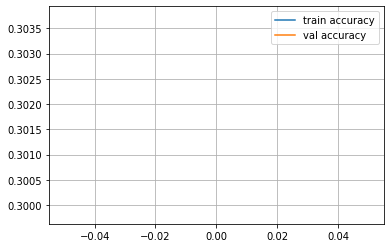

Epoch 1
Train accuracy: 0.3159839527027027
Val accuracy: 0.3158413402315841


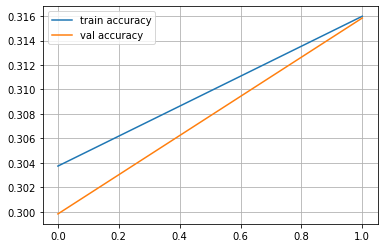

Epoch 2
Train accuracy: 0.32896959459459457
Val accuracy: 0.3291451096329145


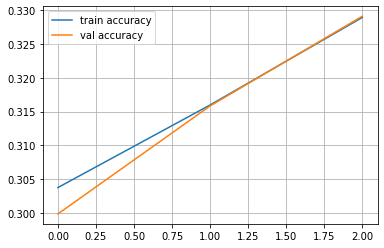

Epoch 3
Train accuracy: 0.3407939189189189
Val accuracy: 0.344419807834442


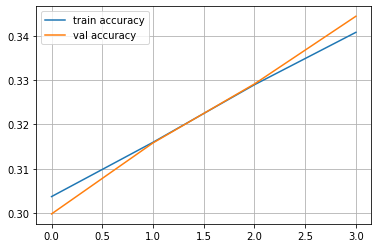

Epoch 4
Train accuracy: 0.3614864864864865
Val accuracy: 0.36240453313624044


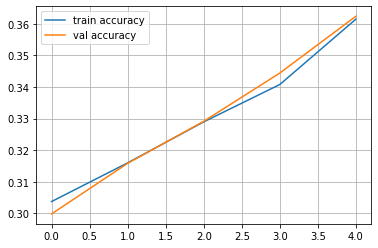

Epoch 5
Train accuracy: 0.38217905405405406
Val accuracy: 0.38186745503818675


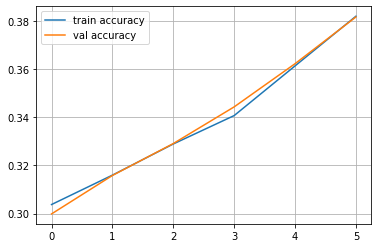

Epoch 6
Train accuracy: 0.4055109797297297
Val accuracy: 0.40822862774082286


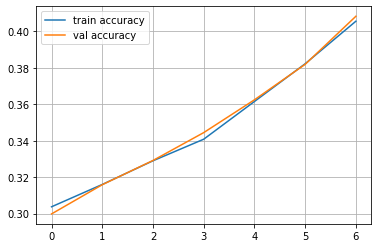

Epoch 7
Train accuracy: 0.4211359797297297
Val accuracy: 0.4254742547425474


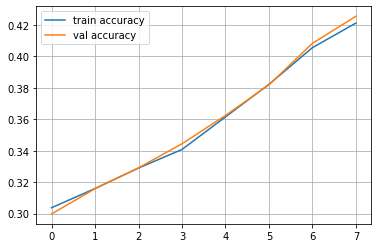

Epoch 8
Train accuracy: 0.43253800675675674
Val accuracy: 0.43976348854397634


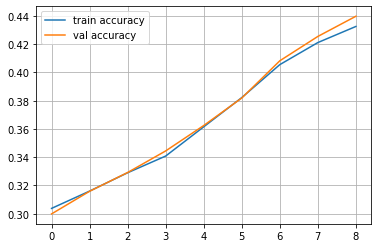

Epoch 9
Train accuracy: 0.44277871621621623
Val accuracy: 0.44567627494456763


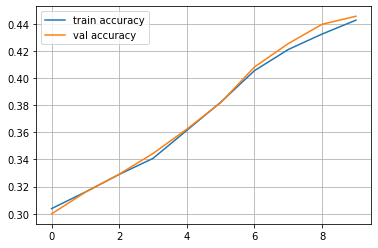

Epoch 10
Train accuracy: 0.4471072635135135
Val accuracy: 0.4501108647450111


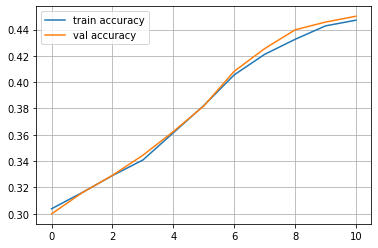

Epoch 11
Train accuracy: 0.45080236486486486
Val accuracy: 0.45528455284552843


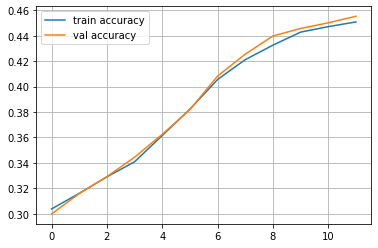

Epoch 12
Train accuracy: 0.45291385135135137
Val accuracy: 0.46242916974624293


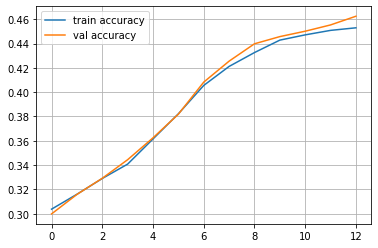

Epoch 13
Train accuracy: 0.4562922297297297
Val accuracy: 0.4648928307464893


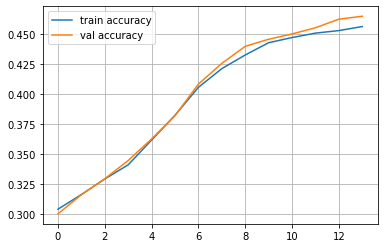

Epoch 14
Train accuracy: 0.4585092905405405
Val accuracy: 0.4678492239467849


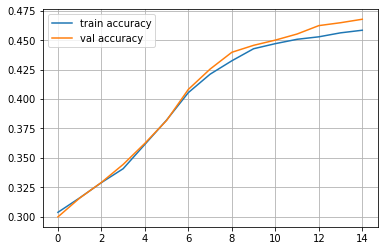

Epoch 15
Train accuracy: 0.4609375
Val accuracy: 0.4685883222468588


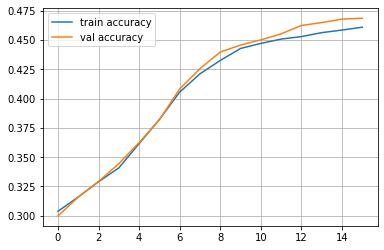

Epoch 16
Train accuracy: 0.46378800675675674
Val accuracy: 0.47129834934712983


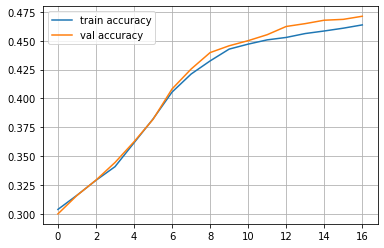

Epoch 17
Train accuracy: 0.46621621621621623
Val accuracy: 0.4717910815471791


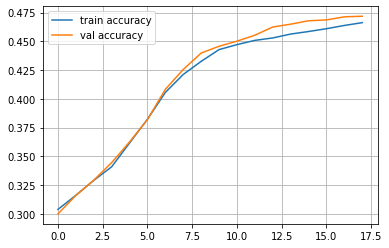

Epoch 18
Train accuracy: 0.4670608108108108
Val accuracy: 0.4730229120473023


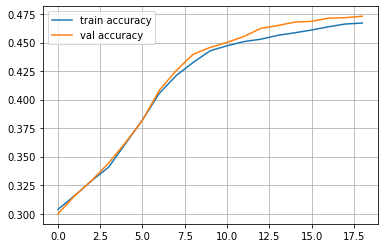

Epoch 19
Train accuracy: 0.46980574324324326
Val accuracy: 0.4745011086474501


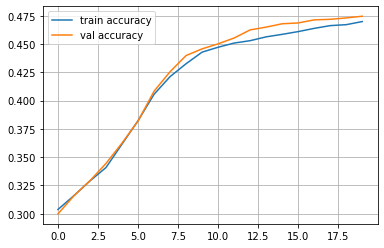

Epoch 20
Train accuracy: 0.47128378378378377
Val accuracy: 0.47548657304754866


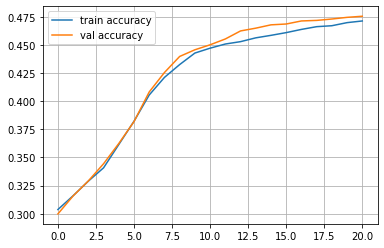

Epoch 21
Train accuracy: 0.4730785472972973
Val accuracy: 0.4764720374476472


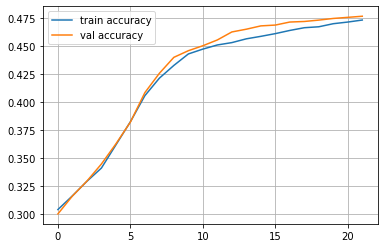

Epoch 22
Train accuracy: 0.47592905405405406
Val accuracy: 0.4794284306479428


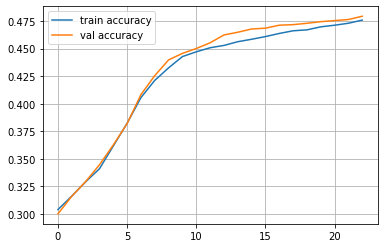

Epoch 23
Train accuracy: 0.47856841216216217
Val accuracy: 0.4804138950480414


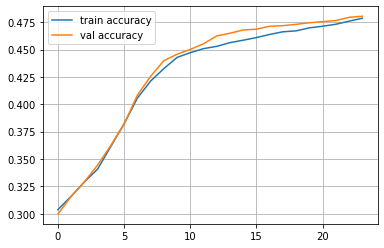

Epoch 24
Train accuracy: 0.48110219594594594
Val accuracy: 0.4811529933481153


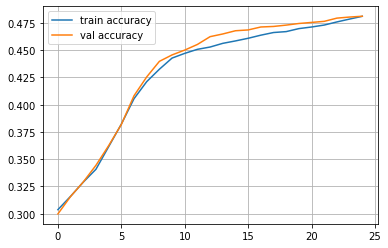

precision: 0.5008938889070702
recall: 0.4822107350366654
f1: 0.4740385644436577
accuracy: 0.4811529933481153
Confusion matrix: 
[[876 173 291]
 [492 466 410]
 [588 152 611]]


In [45]:
from IPython.display import clear_output
import numpy as np

network = MLP([10, 15, 20, 3], len(inputs))

train_log = []
val_log = []
for epoch in range(25):
    network.fit(x_train, y_train)   
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test) == y_test))
    #clear_output()
    print("Epoch", epoch)
    print("Train accuracy:", train_log[-1])
    print("Val accuracy:", val_log[-1])  
    plt.plot(train_log,label = 'train accuracy')
    plt.plot(val_log,label = 'val accuracy')
    plt.legend(loc = 'best')
    plt.grid()
    plt.show()

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

## Έτοιμο Multi-Layer Perceptron 

Όπως και με τις τεχνικές των παραπάνω ερωτημάτων έτσι και εδώ υπάρχει έτοιμη η παραπάνω κλάση σε διάφορες βιβλιοθήκες. Έτσι στο δεύτερο μέρος του ερωτήματος αυτού θα κατασκευάσετε το ίδιο MLP χρησιμοποιώντας όμως την έτοιμη κλάση [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)  της βιβλιοθήκης scikit-learn. Παρακάτω παρουσιάζεται ένα παράδειγμα χρήσης της κλάσης αυτής. 

In [46]:
from sklearn.neural_network import MLPClassifier

epochs = 25
mlp = MLPClassifier(hidden_layer_sizes=(10, 15, 20), max_iter = epochs)

mlp.fit(x_train,y_train)

y_pred = mlp.predict(x_test)
eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

precision: 0.7519999184954256
recall: 0.7441431704395246
f1: 0.7448005789973009
accuracy: 0.7445183542744518
Confusion matrix: 
[[ 904  283  153]
 [ 151 1079  138]
 [  75  237 1039]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


## Σύγκριση υλοποιήσεων 

  

Στα παρακάτω κελιά πειραματιστείτε με τις δύο υλοποιήσεις (τη δική σας και την έτοιμη). Συγκρίνετε τα αποτελέσματά σας τόσο ως προς τους χρόνους εκτέλεσης αλλά και ως προς τα αποτελέσματα. Η διαφορά των αποτελεσμάτων προκύπτει από το ότι στην έτοιμη κλάση έχουν γίνει αρκετές βελτιστοποιήσεις στην λειτουργία, στον τρόπο εκπαίδευσης κ.α. με αποτέλεσμα να προκύπτουν καλύτερα αποτέλεσματα. Παρόλα αυτά στην δική μας κλάση έχουμε καλύτερο έλεγχο και έχουμε την δυνατότητα να σχεδιάσουμε πιο σύνθετες αρχιτεκτονικές καθώς να αλλάξουμε τις τιμές παραμέτρων που στην έτοιμη κλάση μπορεί να μην μας δίνεται η δυνατότητα. 


In [47]:
network = MLP([10, 15, 20, 3], len(inputs))
train_log = []
val_log = []
def do(num):
  for epoch in range(num):
    network.fit(x_train, y_train)   
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test) == y_test))
  y_pred = network.predict(x_test)

  eval = Evaluate(y_test, y_pred)
  eval.get_evaluation_report()

%time do(25)

precision: 0.6881094057019984
recall: 0.48144323303640574
f1: 0.39142201355238554
accuracy: 0.4794284306479428
Confusion matrix: 
[[ 661    0  679]
 [ 151   11 1206]
 [  76    1 1274]]
CPU times: user 28.3 s, sys: 255 ms, total: 28.6 s
Wall time: 28.5 s


In [48]:
epochs = 25
mlp = MLPClassifier(hidden_layer_sizes=(10, 15, 20), max_iter = epochs)
%time mlp.fit(x_train,y_train)
y_pred = mlp.predict(x_test)
eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

CPU times: user 984 ms, sys: 2.86 ms, total: 987 ms
Wall time: 994 ms
precision: 0.7463463918676746
recall: 0.7359118797991723
f1: 0.7361491188214883
accuracy: 0.7363882729736388
Confusion matrix: 
[[ 863  302  175]
 [ 139 1081  148]
 [  63  243 1045]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [49]:
network = MLP([10, 15, 20, 3], len(inputs))
train_log = []
val_log = []
def do(num):
  for epoch in range(num):
    network.fit(x_train, y_train)   
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test) == y_test))
  y_pred = network.predict(x_test)

  eval = Evaluate(y_test, y_pred)
  eval.get_evaluation_report()

%time do(100)

precision: 0.6187449122693144
recall: 0.5939479937007298
f1: 0.5579554144039818
accuracy: 0.5922641044592264
Confusion matrix: 
[[ 892   96  352]
 [ 446  326  596]
 [ 111   54 1186]]
CPU times: user 1min 50s, sys: 751 ms, total: 1min 51s
Wall time: 1min 51s


In [50]:
epochs = 100
mlp = MLPClassifier(hidden_layer_sizes=(10, 15, 20), max_iter = epochs)
%time mlp.fit(x_train,y_train)
y_pred = mlp.predict(x_test)
eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

CPU times: user 4 s, sys: 19.5 ms, total: 4.02 s
Wall time: 4.01 s
precision: 0.7567641627435483
recall: 0.7493172887020393
f1: 0.749834393520362
accuracy: 0.7496920423749692
Confusion matrix: 
[[ 908  283  149]
 [ 140 1084  144]
 [  79  221 1051]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [51]:
network = MLP([10, 15, 20, 3], len(inputs))
train_log = []
val_log = []
def do(num):
  for epoch in range(num):
    network.fit(x_train, y_train)   
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test) == y_test))
  y_pred = network.predict(x_test)

  eval = Evaluate(y_test, y_pred)
  eval.get_evaluation_report()

%time do(400)

precision: 0.7332133485021259
recall: 0.6962794513242437
f1: 0.6976654607233476
accuracy: 0.6972160630697216
Confusion matrix: 
[[ 784  411  145]
 [ 122 1160   86]
 [  46  419  886]]
CPU times: user 7min 54s, sys: 2.25 s, total: 7min 56s
Wall time: 7min 56s


In [52]:
epochs = 400
mlp = MLPClassifier(hidden_layer_sizes=(10, 15, 20), max_iter = epochs)
%time mlp.fit(x_train,y_train)
y_pred = mlp.predict(x_test)
eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

CPU times: user 10 s, sys: 22.7 ms, total: 10 s
Wall time: 10.1 s
precision: 0.761057655912062
recall: 0.7560717084774939
f1: 0.7562851944432339
accuracy: 0.7563439270756344
Confusion matrix: 
[[ 925  254  161]
 [ 149 1065  154]
 [  71  200 1080]]


Παρατηρούμε πως καθώς αυξάνεται ο αριθμός των εποχών πετυχαίνουμε σύγκλιση και συνεπώς και στις δύο περιπτώσεις παρατηρούμε καλύτερη ακρίβεια. Όμως η ακρίβεια του έτοιμου MLP είναι πολύ καλύτερη όπως και ο χρόνος εκτέλεσης (ιδιαίτερα για μεγάλο αριθμό εποχών όπως δείξαμε παραπάνω), το οποίο δικαιολογείται από το γεγονός πως έχει πιθανότατα διαφορετική δομή και αξιοποιεί μεθόδους βελτιστοποιήσης.

# Αξιολόγηση- Συμπεράσματα 

  

Τέλος στο σημείο αυτό καλείστε να αξιολογήσετε τις διάφορες τεχνικές ταξινόμησης (KNN, Naive Bayes, MLP), τα αποτελέσματά τους, τους χρόνους εκτέλεσης, και να παραθέσετε παρατηρήσεις καθώς και οτιδήποτε σας φάνηκε ενδιαφέρον ή ιδιαίτερο. 



Απάντηση/Σχολιασμός:
Σχετικά με την ακρίβεια παρατηρούμε πως την μεγαλύτερη ακρίβεια την έχουμε για την έτοιμη συνάρτηση MLP και τον ταξινομητή knn με k=10, μετά ακολουθούν οι υπόλοιποι ταξινομητές (την χειρότερη ακρίβεια τη συναντούμε στον gnb). Στη συνέχεια σχετικά με τον χρόνο εκτέλεσης παρατηρούμε πως το μικρότερο χρόνο τον έχουμε στις έτοιμες υλοποιήσεις που είναι βελτιστοποιημένες, ενώ το μεγαλύτερο χρονικό διάστημα διαρκεί ο MLP που δημιουργήσαμε. 